# Oficina 7: Usando um algoritmo de clustering

Você foi contratado como analista de dados para uma loja on-line que deseja entender melhor os padrões de compra de seus clientes. 

A empresa possui dados sobre várias características dos clientes, como o valor médio gasto, a frequência de compras e o número de categorias de produtos comprados. No entanto, esses dados não possuem rótulos que definem quais grupos de clientes existem.


Seu objetivo é segmentar os clientes em grupos semelhantes, usando um algoritmo de clustering.  Vamos lá?!



Instruções:

- Primeiro, gere o Dataset:

1. Utilize o Python para criar um dataset sintético com pelo menos 300 registros de clientes;

2. O dataset deve conter pelo menos 3 features que representam diferentes aspectos do comportamento do cliente, como:

`valor_medio_gasto`: representa o valor médio gasto por compra.

 `frequencia_compras`: representa o número de compras feitas em um mês.

`categorias_produtos`: representa o número de categorias de produtos comprados.

Dica: Você pode utilizar a função `numpy.random.randn` para gerar dados com uma distribuição normal para essas features, garantindo que os valores tenham alguma variabilidade.

# Imports

In [37]:
# Manipalação dos Dados:
import numpy as np
import pandas as pd

# Gráficos 
import matplotlib.pyplot as plt
import seaborn as sns

# Normalização:
from sklearn.preprocessing import StandardScaler

# Clusters
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Métrica:
from sklearn.metrics import silhouette_score

## Formatação da Página:

# Gerando os dados

In [41]:
np.random.seed(42)

# Número de amostras:
n_samples = 300
print(n_samples)

300


In [42]:
# Gerando os dados:
data = {
    'valor_medio_gasto' : np.random.randn(n_samples)*20+200,
    'frequencia_compras': np.random.randn(n_samples)*5+15,
    'categoria_produtos': np.random.randn(n_samples)*2+8
}

# Convertendo para Dataframe:
df = pd.DataFrame(data)

In [43]:
df

,valor_medio_gasto,frequencia_compras,categoria_produtos
0,209.934283,10.855025,9.513977
1,197.234714,12.199095,6.155669
2,212.953771,18.736468,9.739212
3,230.460597,18.051851,10.711276
4,195.316933,14.895492,8.826870
...,...,...,...
295,186.141808,12.449918,9.297420
296,217.991998,13.650625,7.665764
297,206.145990,10.106181,8.293427
298,216.257242,12.778534,10.413018


## Valores mínimos e máximos prováveis?

Como as trÊs variáveis que serão geradas segue uma distribuição normal, ou seja, com média igual e desvio padrão igual à 1.

$$ Feature_n = 

Os valores gerados seguem uma distribuição normal, que teoricamente varia de -∞ a +∞, mas, na prática, eles se concentram em torno da média e do desvio padrão.

Os valores de uma distribuição normal geralmente ficam dentro do intervalo de 3 desvios padrão da média (𝜇 ± 3 𝜎), o que cobre 99,7% dos valores gerados.

$$ Mínimo=μ−3σ $$

$$ Máximo=μ+3σ $$

1️⃣ "valor_medio_gasto" → 𝑁(200,202)
𝜇=200, 𝜎=20

Mínimo provável: 200−3(20)=140

Máximo provável:200+3(20)=260

2️⃣ "frequencia_compras" → 

N(15,5 2)
μ=15, σ=5
Mínimo provável: 15−3(5)=0 (não pode ser negativo, então ajustamos para 0)
Máximo provável: 15+3(5)=30

3️⃣ "categoria_produtos" → N(8,2 2)
μ=8, σ=2
Mínimo provável: 8−3(2)=2
Máximo provável: 8+3(2)=

In [5]:
df

,valor_medio_gasto:,frequencia_compras,categoria_produtos
0,235.281047,8.467366,4.899141
1,208.003144,23.290653,8.834638
2,219.574760,14.409180,6.111263
3,244.817864,11.599109,8.476206
4,237.351160,18.331915,5.188074
...,...,...,...
295,222.737827,16.896178,11.995912
296,201.954499,12.649836,6.286901
297,211.659074,13.916343,4.916825
298,192.011019,10.349217,13.188849


# Normalizando os Dados:

In [44]:
# Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicando o Agrupamento

In [15]:
# Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

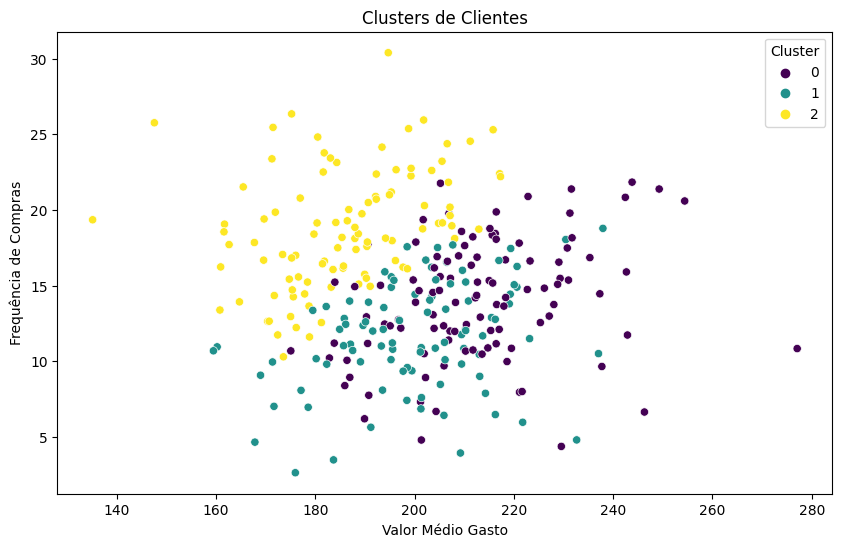

In [21]:
# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['valor_medio_gasto'], y=df['frequencia_compras'], hue=df['cluster'], palette='viridis')
plt.xlabel("Valor Médio Gasto")
plt.ylabel("Frequência de Compras")
plt.title("Clusters de Clientes")
plt.legend(title="Cluster")
plt.show()


## Definindo o número ideal de clusters

In [22]:
# Encontrando o número ideal de clusters usando o método do cotovelo
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


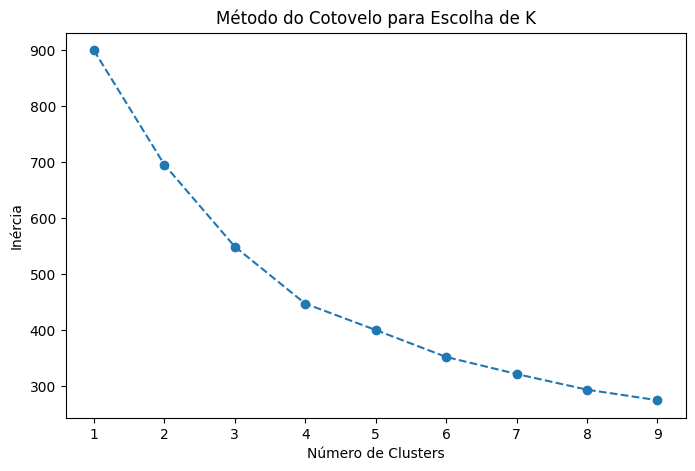

In [23]:

# Plotando o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para Escolha de K")
plt.show()

In [35]:
# Aplicando K-Means com o número de clusters adequado
optimal_k = 6  # Definido com base no método do cotovelo
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [36]:
# Avaliação do clustering usando o coeficiente de Silhouette
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
print(f"Coeficiente de Silhouette: {silhouette_avg:.2f}")

Coeficiente de Silhouette: 0.24


- Próximo de 1 → Os clusters estão bem separados e os pontos estão bem agrupados.
- Próximo de 0 → Os clusters podem estar sobrepostos ou mal definidos.
- Próximo de -1 → Muitos pontos podem estar no cluster errado.

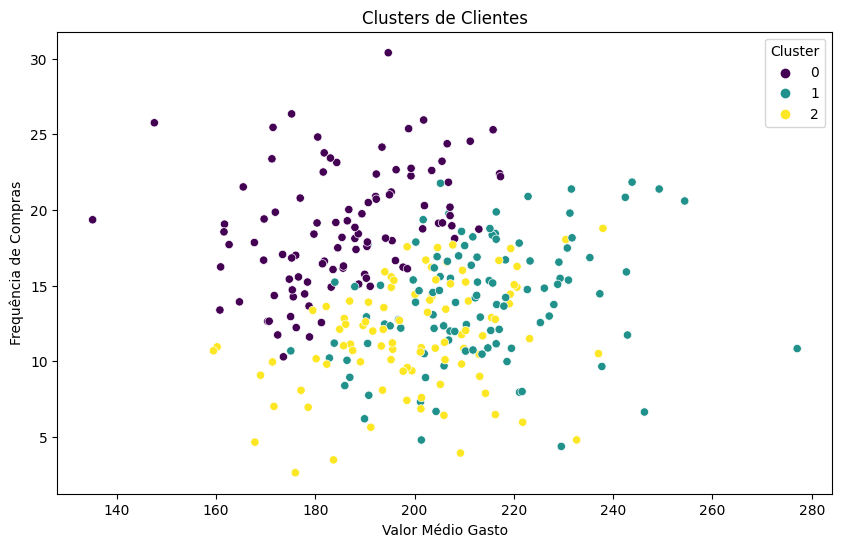

In [34]:
# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['valor_medio_gasto'], y=df['frequencia_compras'], hue=df['cluster'], palette='viridis')
plt.xlabel("Valor Médio Gasto")
plt.ylabel("Frequência de Compras")
plt.title("Clusters de Clientes")
plt.legend(title="Cluster")
plt.show()


# Justificativa:
print("""
Justificativa da Escolha do Algoritmo:

O algoritmo escolhido foi o K-Means porque:
1. O problema envolve segmentação de clientes, e o K-Means é eficiente para agrupar dados contínuos com padrões distintos.
2. É um método rápido e escalável, adequado para datasets médios a grandes.
3. O formato dos dados (valor gasto, frequência de compras e categoria) sugere que os clientes podem ser agrupados em segmentos bem definidos.

Para garantir que o número de clusters foi bem escolhido, utilizamos o **método do cotovelo**, que analisa a variação da inércia ao longo dos valores de K. Além disso, avaliamos a qualidade do clustering com o **coeficiente de Silhouette**.

Vantagens:
- Simplicidade e eficiência computacional.
- Fácil interpretação dos clusters formados.
- Método do cotovelo auxilia na escolha de um K adequado.
- O coeficiente de Silhouette permite validar a eficiência do clustering.

Limitações:
- Sensível a outliers e variações na escala dos dados (por isso aplicamos normalização).

Interpretação dos Clusters:
Os clusters podem indicar diferentes perfis de clientes, por exemplo:
- Clientes que compram com alta frequência e gastam muito.
- Clientes com baixa frequência de compras e menor gasto.
- Clientes com padrões intermediários.
Isso pode ajudar a loja online a criar estratégias de marketing personalizadas.
""")


In [45]:
# Aplicando DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Parâmetros podem ser ajustados
clusters = dbscan.fit_predict(df_scaled)
df['cluster'] = clusters

In [51]:
# Avaliação do clustering (Silhouette Score apenas se houver mais de 1 cluster válido)
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f"Coeficiente de Silhouette: {silhouette_avg:.2f}")
else:
    print("Todos os pontos foram classificados como ruído pelo DBSCAN.")

Coeficiente de Silhouette: 0.41


In [52]:
df

,valor_medio_gasto,frequencia_compras,categoria_produtos,cluster
0,209.934283,10.855025,9.513977,0
1,197.234714,12.199095,6.155669,0
2,212.953771,18.736468,9.739212,0
3,230.460597,18.051851,10.711276,0
4,195.316933,14.895492,8.826870,0
...,...,...,...,...
295,186.141808,12.449918,9.297420,0
296,217.991998,13.650625,7.665764,0
297,206.145990,10.106181,8.293427,0
298,216.257242,12.778534,10.413018,0


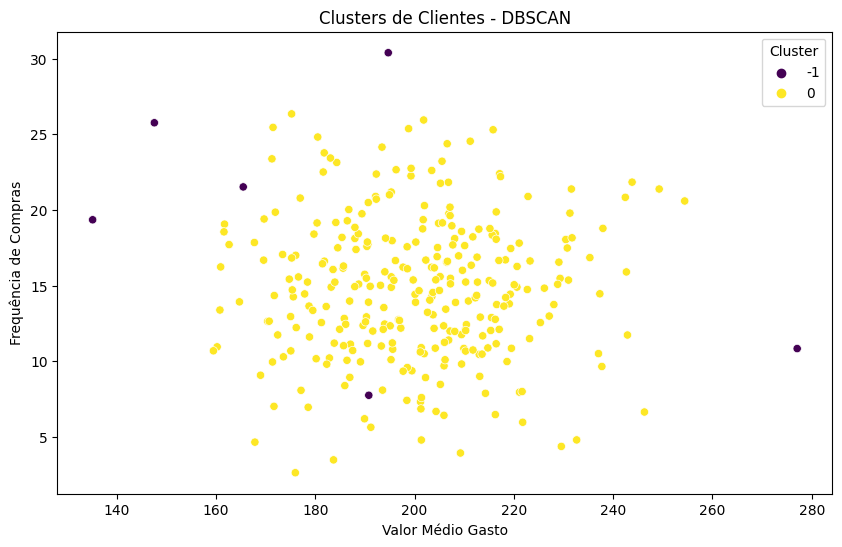

In [47]:

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['valor_medio_gasto'], y=df['frequencia_compras'], hue=df['cluster'], palette='viridis')
plt.xlabel("Valor Médio Gasto")
plt.ylabel("Frequência de Compras")
plt.title("Clusters de Clientes - DBSCAN")
plt.legend(title="Cluster")
plt.show()


# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['valor_medio_gasto'], y=df['frequencia_compras'], hue=df['cluster'], palette='viridis')
plt.xlabel("Valor Médio Gasto")
plt.ylabel("Frequência de Compras")
plt.title("Clusters de Clientes - DBSCAN")
plt.legend(title="Cluster")
plt.show()